## This notebook is dedicated to predicting our taget, whether a given flight got delayed or not

In [1]:
import pandas as pd
import numpy as np

### start by importing the basic data libraries and load our clean data

In [2]:
clean=pd.read_csv('../Data/clean/cleaned_airlines.csv')

In [3]:
clean

,airline,flight_id,airport_from,airport_to,day_of_week,departure_hour,flight_length,delay,part_of_day
0,CO,269,SFO,IAH,3,0,205,1,night
1,US,1558,PHX,CLT,3,0,222,1,night
2,AA,2400,LAX,DFW,3,0,165,1,night
3,AA,2466,SFO,DFW,3,0,195,1,night
4,AS,108,ANC,SEA,3,0,202,0,night
...,...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,23,326,0,night
539379,FL,398,SEA,ATL,5,23,305,0,night
539380,FL,609,SFO,MKE,5,23,255,0,night
539381,UA,78,HNL,SFO,5,23,313,1,night


### Split into X and y and check right now the class imbalance

In [4]:
y=clean['delay']
X=clean.drop(['delay', 'flight_id'], axis=1)

In [5]:
display(y)
display((y.value_counts()/len(y))*100)
print()
display(X)

0         1
1         1
2         1
3         1
4         0
         ..
539378    0
539379    0
539380    0
539381    1
539382    1
Name: delay, Length: 539383, dtype: int64

0    55.455771
1    44.544229
Name: delay, dtype: float64

,airline,airport_from,airport_to,day_of_week,departure_hour,flight_length,part_of_day
0,CO,SFO,IAH,3,0,205,night
1,US,PHX,CLT,3,0,222,night
2,AA,LAX,DFW,3,0,165,night
3,AA,SFO,DFW,3,0,195,night
4,AS,ANC,SEA,3,0,202,night
...,...,...,...,...,...,...,...
539378,CO,OGG,SNA,5,23,326,night
539379,FL,SEA,ATL,5,23,305,night
539380,FL,SFO,MKE,5,23,255,night
539381,UA,HNL,SFO,5,23,313,night


### The flight id was dropped here, since even there's way too many values on it, and as a rule of thumb we shouldn't keep id columns for prediction models  
### Another interesting thing we noticed is that while we have a slight class imbalace, it's incredibly small and we'll choose NOT to balance it

In [6]:
from sklearn.model_selection import train_test_split

### Let's do our train test split. Since we have a huge dataset with over half a million rows, we can use a bigger test size

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pickle

### After the train test split, let's do some prep work for the scaling and encoding

In [9]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

In [10]:
display(X_train_cat.head())
display(X_train_num.head())

,airline,airport_from,airport_to,part_of_day
511906,XE,IAH,CLT,morning
519215,B6,SRQ,JFK,afternoon
445387,MQ,DFW,LIT,afternoon
146144,EV,IAD,ROC,morning
290903,WN,SEA,OAK,afternoon


,day_of_week,departure_hour,flight_length
511906,4,10,139
519215,4,17,164
445387,7,17,70
146144,4,12,73
290903,5,17,125


### We have now split the train set into categortical (for encoding) and numerical (for scaling)

In [11]:
X_train_scaling=X_train_num[['flight_length']]
X_train_no_scaling=X_train_num.drop(['flight_length'], axis=1)

In [12]:
display(X_train_scaling.head())
display(X_train_no_scaling.head())

,flight_length
511906,139
519215,164
445387,70
146144,73
290903,125


,day_of_week,departure_hour
511906,4,10
519215,4,17
445387,7,17
146144,4,12
290903,5,17


### But since we only need to scale flight length, we're splitting them up first and will now repeat these steps for the test set

In [13]:
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [14]:
X_test_scaling=X_test_num[['flight_length']]
X_test_no_scaling=X_test_num.drop(['flight_length'], axis=1)

In [15]:
display(X_test_cat.head())
display(X_test_scaling.head())
display(X_test_no_scaling.head())

,airline,airport_from,airport_to,part_of_day
448599,B6,BOS,TPA,night
497739,AA,DFW,DTW,afternoon
65638,9E,ATL,HPN,afternoon
205461,UA,SFO,BOS,night
209825,AS,SFO,SEA,morning


,flight_length
448599,199
497739,155
65638,143
205461,340
209825,134


,day_of_week,departure_hour
448599,7,20
497739,3,14
65638,6,17
205461,7,22
209825,1,9


### With all of the data from both sets neatly split, it's about time we start doing some scaling and encoding

In [16]:
scaler = StandardScaler().fit(X_train_scaling)
with open("../Scalers/StandardScaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)

In [17]:
num_train_stand = scaler.transform(X_train_scaling)
num_train_pd = pd.DataFrame(num_train_stand, columns = X_train_scaling.columns)

num_test_stand = scaler.transform(X_test_scaling)
num_test_pd = pd.DataFrame(num_test_stand, columns = X_test_scaling.columns)

In [18]:
display(num_train_pd.describe().T)
print()
display(num_test_pd.describe().T)

,count,mean,std,min,25%,50%,75%,max
flight_length,377568.0,-5.447141e-17,1.000001,-1.884034,-0.729946,-0.245515,0.424141,7.448399


,count,mean,std,min,25%,50%,75%,max
flight_length,161815.0,-0.001403,0.996751,-1.884034,-0.729946,-0.245515,0.424141,7.448399


### With the scaling out of the way, let's do the encoding next

In [19]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
with open("../Encoders/OneHotEncoder.pkl", 'wb') as file:
    pickle.dump(encoder, file)

In [20]:
cat_train_encoded = encoder.transform(X_train_cat).toarray()
cat_train_pd = pd.DataFrame(cat_train_encoded, columns = encoder.get_feature_names_out())

cat_test_encoded = encoder.transform(X_test_cat).toarray()
cat_test_pd = pd.DataFrame(cat_test_encoded, columns = encoder.get_feature_names_out())

In [21]:
display(cat_train_pd.head())
print()
display(cat_test_pd.head())

,airline_AA,airline_AS,airline_B6,airline_CO,airline_DL,airline_EV,airline_F9,airline_FL,airline_HA,airline_MQ,...,airport_to_TYS,airport_to_UTM,airport_to_VLD,airport_to_VPS,airport_to_WRG,airport_to_XNA,airport_to_YAK,airport_to_YUM,part_of_day_morning,part_of_day_night
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,airline_AA,airline_AS,airline_B6,airline_CO,airline_DL,airline_EV,airline_F9,airline_FL,airline_HA,airline_MQ,...,airport_to_TYS,airport_to_UTM,airport_to_VLD,airport_to_VPS,airport_to_WRG,airport_to_XNA,airport_to_YAK,airport_to_YUM,part_of_day_morning,part_of_day_night
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
X_train_no_scaling = X_train_no_scaling.reset_index(drop=True)

X_test_no_scaling = X_test_no_scaling.reset_index(drop=True)

In [23]:
X_train_f = pd.concat([X_train_no_scaling, num_train_pd, cat_train_pd], axis=1)

X_test_f = pd.concat([X_test_no_scaling, num_test_pd, cat_test_pd], axis=1)

In [24]:
X_train_f

,day_of_week,departure_hour,flight_length,airline_AA,airline_AS,airline_B6,airline_CO,airline_DL,airline_EV,airline_F9,...,airport_to_TYS,airport_to_UTM,airport_to_VLD,airport_to_VPS,airport_to_WRG,airport_to_XNA,airport_to_YAK,airport_to_YUM,part_of_day_morning,part_of_day_night
0,4,10,0.096437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,4,17,0.452637,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,17,-0.886674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,12,-0.843930,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,17,-0.103035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377563,6,5,-1.043402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
377564,7,21,0.025197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
377565,7,10,2.547091,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
377566,7,19,-0.430739,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X_test_f

,day_of_week,departure_hour,flight_length,airline_AA,airline_AS,airline_B6,airline_CO,airline_DL,airline_EV,airline_F9,...,airport_to_TYS,airport_to_UTM,airport_to_VLD,airport_to_VPS,airport_to_WRG,airport_to_XNA,airport_to_YAK,airport_to_YUM,part_of_day_morning,part_of_day_night
0,7,20,0.951316,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,3,14,0.324405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,17,0.153429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,22,2.960283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,9,0.025197,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161810,1,13,0.324405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161811,7,11,-0.174275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
161812,7,15,-0.245515,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
161813,7,8,0.409893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
print(len(X_train))
print(len(X_train_f))
print()
print(len(X_test))
print(len(X_test_f))

377568
377568

161815
161815


### Currently we have our data very nicely preppared to train our prediction models, but we still have one problem: after the encoding we now have over 600 features
### We need to reduce this number, so we'll use PCA to extract the more relevant ones

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA()
pca.fit(X_train_f)

PCA()

In [29]:
with open("../PCA/pca.pkl", 'wb') as file:
    pickle.dump(pca, file)

In [30]:
per_var = np.round(pca.explained_variance_ratio_, decimals=3)
per_var

array([0.737, 0.126, 0.035, 0.006, 0.004, 0.003, 0.003, 0.003, 0.003,
       0.003, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.002, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ,

### We have our pca now and we took a peek into the explained variances, which give the impression that the first 3 should be good enough
### We'll now create the labels to use as DataFrame columns and do some visualization of our components and cumulative explained variance

In [31]:
labels = ['PC'+ str(x) for x in range(1,len(per_var)+1)]

In [32]:
loadings = pca.components_.T
loading_df = pd.DataFrame(loadings, columns = labels, index=X_train_f.columns)
loading_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC597,PC598,PC599,PC600,PC601,PC602,PC603,PC604,PC605,PC606
day_of_week,-2.990754e-04,9.999484e-01,-0.009679,0.001396,0.000547,-0.000212,0.000443,0.000488,0.000037,-0.000058,...,-0.000002,0.000003,-0.000001,-0.000006,-2.702233e-08,-4.284890e-06,-1.837055e-06,-4.870060e-06,7.604981e-07,9.405466e-07
departure_hour,-9.957345e-01,-1.524611e-04,0.005011,0.003667,-0.000995,-0.000647,-0.025120,-0.065080,-0.023146,-0.007409,...,-0.000005,0.000011,0.000005,0.000003,6.432817e-06,-4.081974e-06,1.747230e-07,1.986279e-06,-4.243828e-06,3.871245e-06
flight_length,4.590008e-03,9.520411e-03,0.990216,0.040588,-0.006445,0.044797,0.009058,0.005719,-0.019330,0.002296,...,0.000020,0.000017,-0.000112,0.000012,-6.209037e-05,-1.322326e-05,-2.297116e-06,3.113300e-06,-3.587741e-05,-5.766828e-06
airline_AA,1.091501e-04,6.399687e-04,0.052519,-0.083280,-0.317483,-0.507841,-0.466386,0.152369,0.247241,-0.234036,...,0.000307,0.000245,-0.000050,-0.000145,-5.272776e-05,-5.131016e-05,4.957358e-05,2.976917e-04,2.563488e-04,2.906450e-04
airline_AS,7.851504e-05,2.546146e-04,0.012158,-0.005063,-0.014081,0.015189,0.021288,-0.010763,-0.001662,-0.003144,...,0.000170,0.000140,0.000011,-0.001080,3.660384e-05,-5.595882e-04,5.512454e-05,3.426296e-04,3.768338e-04,4.324496e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
airport_to_XNA,-1.345444e-04,-7.476693e-05,-0.000714,-0.002483,-0.002610,-0.002422,0.002007,-0.000142,-0.006192,0.002846,...,-0.000161,-0.003114,-0.003533,0.000303,-4.182342e-05,-4.298835e-03,3.030379e-03,-4.246686e-03,1.153773e-03,-5.780450e-02
airport_to_YAK,8.290957e-07,9.966382e-07,-0.000112,-0.000071,-0.000057,-0.000029,0.000093,-0.000077,-0.000021,-0.000044,...,0.009829,-0.008179,-0.005232,-0.013720,1.929458e-03,-4.177232e-03,3.823002e-03,-4.503107e-03,3.037674e-03,-6.027429e-02
airport_to_YUM,-4.691894e-05,-8.803844e-06,-0.000593,-0.000586,-0.000851,0.001922,-0.000646,-0.000309,0.001662,0.000259,...,-0.000242,-0.003526,-0.003763,0.000340,-2.241438e-04,-4.336125e-03,3.084221e-03,-4.305599e-03,1.144602e-03,-5.815885e-02
part_of_day_morning,8.806547e-02,9.199896e-04,0.005309,0.020639,-0.005259,0.020364,-0.320363,-0.845994,-0.175380,-0.078713,...,-0.000092,0.000021,0.000071,0.000048,1.578130e-05,1.516637e-07,-1.573373e-05,1.449470e-05,-6.122837e-05,2.695230e-05


In [33]:
cum_var=np.cumsum(np.round(per_var, 3))
per_var_df = pd.DataFrame(per_var, columns= ['explained_variance'])
cum_var_df = pd.DataFrame(cum_var, columns= ['cumulative_variance'])
pc_df = pd.DataFrame(labels, columns=['PC'])

In [34]:
var_df = pd.concat([pc_df, per_var_df, cum_var_df], axis=1)
var_df

,PC,explained_variance,cumulative_variance
0,PC1,0.737,0.737
1,PC2,0.126,0.863
2,PC3,0.035,0.898
3,PC4,0.006,0.904
4,PC5,0.004,0.908
...,...,...,...
601,PC602,0.000,0.975
602,PC603,0.000,0.975
603,PC604,0.000,0.975
604,PC605,0.000,0.975


In [35]:
from matplotlib import pyplot as plt
import seaborn as sns

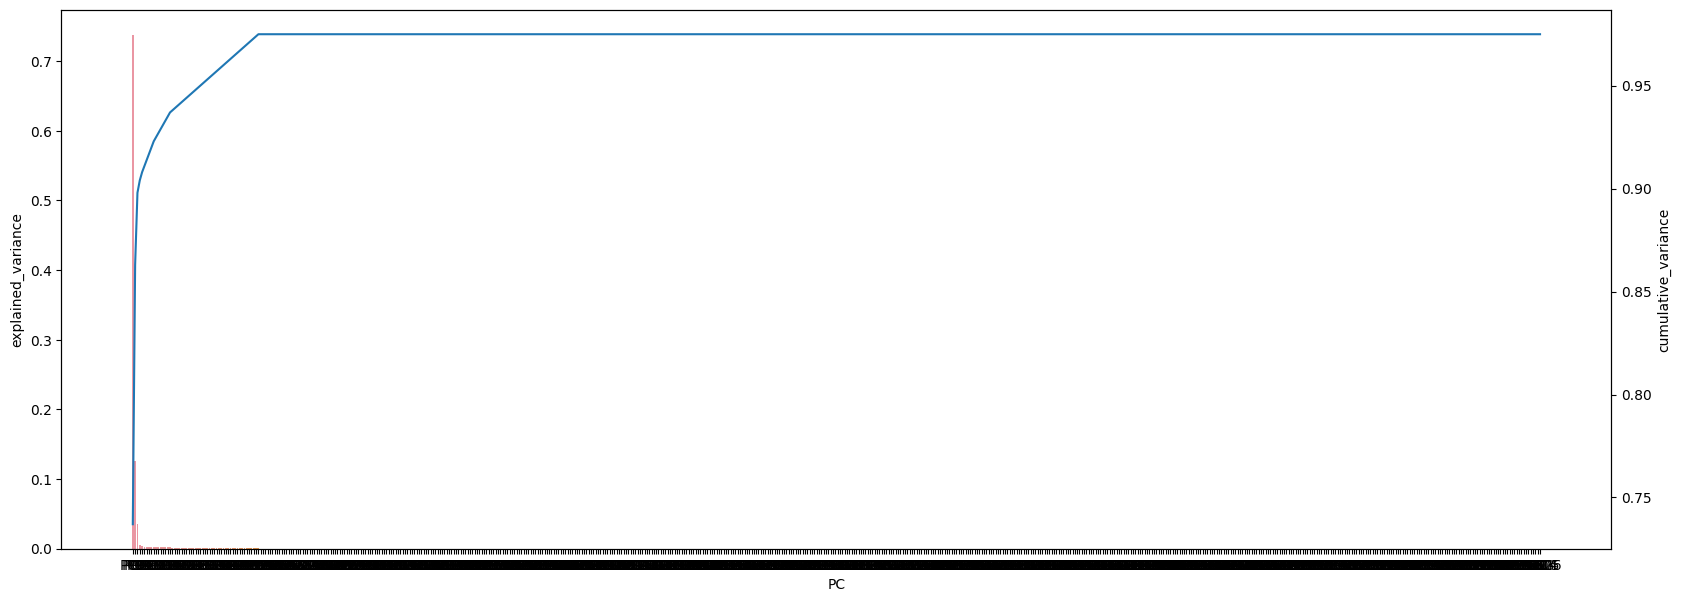

In [36]:
fig, ax1 = plt.subplots(figsize=(20,7))

sns.barplot(data= var_df, x='PC', y='explained_variance', ax=ax1)

ax2 = ax1.twinx()

sns.lineplot(data = var_df['cumulative_variance'], markers='o', ax=ax2)
plt.show()

### The above plot confirms that after the 3rd PC, there's not much change in the explained variance, so we'll only used the first 3 components

In [37]:
pca_train_f=pca.transform(X_train_f)
pca_train_df=pd.DataFrame(pca_train_f, columns=labels)
pca_train_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC597,PC598,PC599,PC600,PC601,PC602,PC603,PC604,PC605,PC606
0,2.978762,0.069309,0.060650,-0.153685,-0.181334,0.008510,0.550426,-0.348420,-0.285980,-0.604762,...,-0.000092,-0.000063,0.000074,5.015377e-05,0.000060,0.000020,-3.270685e-05,-0.000016,-0.000303,0.000003
1,-4.078532,0.072291,0.497255,-0.064388,-0.083930,0.026401,0.177616,0.082796,-0.048283,-0.006076,...,-0.000049,0.000025,-0.000034,-1.281276e-04,-0.000094,-0.000004,-1.313307e-05,-0.000007,-0.000027,0.000082
2,-4.085895,3.058287,-0.919827,-0.222516,-0.345460,-0.489086,0.010072,0.137088,-0.443884,0.615010,...,-0.000360,-0.000763,0.000011,3.260738e-07,0.000046,-0.000015,-6.282589e-07,-0.000023,-0.000023,0.000002
3,0.982276,0.060421,-0.866693,-0.183123,0.036521,-0.088987,0.025033,-0.473930,0.000019,-0.284516,...,-0.000086,-0.000090,0.000056,6.041203e-05,0.000055,0.000011,-7.986798e-06,0.000008,-0.000049,0.000040
4,-4.080796,1.063991,-0.127354,0.862907,0.139630,-0.037670,0.000186,0.178807,-0.047750,0.003688,...,-0.000211,0.000042,0.000013,1.066959e-03,-0.000008,0.000083,-3.930571e-06,-0.000024,-0.000066,-0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377563,7.839304,2.056832,-1.108526,-0.279843,-0.137317,0.013412,0.811542,0.551070,0.162366,-0.534550,...,0.000200,-0.000021,0.000145,-1.640776e-04,-0.000074,0.000065,-3.380649e-05,-0.000062,-0.000071,-0.000110
377564,-8.094696,3.066003,0.022166,-0.244233,0.283675,-0.032751,-0.092747,-0.648488,0.202027,-0.201851,...,0.000032,0.000118,0.000103,3.669160e-05,-0.000007,0.000031,4.649023e-06,-0.000013,-0.000038,-0.000212
377565,2.984644,3.093541,2.534069,-0.347230,0.898139,0.095016,-0.363418,-0.238481,-0.141570,0.018103,...,0.000004,0.000005,0.000083,-4.170852e-05,-0.000146,0.000017,-1.079207e-05,0.000009,-0.000006,-0.000012
377566,-6.073241,3.061923,-0.388233,-0.368071,0.700287,-0.072079,-0.156198,0.139302,-0.134276,0.158949,...,0.000058,0.000061,0.000030,-3.927142e-05,0.000069,-0.000052,4.709304e-06,0.000061,-0.000163,0.000086


In [38]:
pca_train_f=pca_train_df[['PC1','PC2','PC3']]
pca_train_f

,PC1,PC2,PC3
0,2.978762,0.069309,0.060650
1,-4.078532,0.072291,0.497255
2,-4.085895,3.058287,-0.919827
3,0.982276,0.060421,-0.866693
4,-4.080796,1.063991,-0.127354
...,...,...,...
377563,7.839304,2.056832,-1.108526
377564,-8.094696,3.066003,0.022166
377565,2.984644,3.093541,2.534069
377566,-6.073241,3.061923,-0.388233


### This is our final train set data to use when creating models. We now need to repeat the transform process for the test set

In [39]:
pca_test_f=pca.transform(X_test_f)
pca_test_df=pd.DataFrame(pca_test_f, columns=labels)
pca_test_f=pca_test_df[['PC1','PC2','PC3']]
pca_test_f

,PC1,PC2,PC3
0,-7.089966,3.075058,0.976978
1,-1.091250,-0.929019,0.381762
2,-4.084011,2.068366,0.139080
3,-9.072623,3.093476,3.000276
4,3.974288,-2.930145,0.070827
...,...,...,...
161810,-0.092234,-2.929129,0.326065
161811,1.978776,3.066895,-0.228067
161812,-2.091630,3.065098,-0.203347
161813,4.969882,3.073470,0.355423


In [40]:
print(len(X))
print(len(pca_train_f)+len(pca_test_f))

539383
539383


### To start off, we'll use a simple Logistic Regression model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [43]:
lr=LogisticRegression(random_state=12, max_iter=300, solver='saga')
lr.fit(pca_train_f, y_train)
with open("../Models/LogisticRegression.pkl", "wb") as file:
    pickle.dump(lr, file)

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

In [45]:
print("The accuracy for the Logistic Regression in the TRAIN set is {:.2f}".format(lr.score(pca_train_f,y_train)))
print("The accuracy for the Logistic Regression in the TEST  set is {:.2f}".format(lr.score(pca_test_f, y_test)))
print()

y_lr_train_pred=lr.predict(pca_train_f)
y_lr_test_pred=lr.predict(pca_test_f)

print("The kappa for the Logistic Regression in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train, y_lr_train_pred)))
print("The kappa for the Logistic Regression in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_lr_test_pred)))

The accuracy for the Logistic Regression in the TRAIN set is 0.57
The accuracy for the Logistic Regression in the TEST  set is 0.57

The kappa for the Logistic Regression in the TRAIN set is: 0.09
The kappa for the Logistic Regression in the TEST set is: 0.09


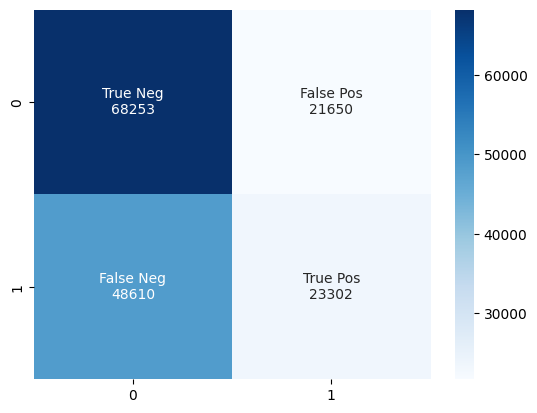

In [46]:
cm_lr=confusion_matrix(y_test, y_lr_test_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm_lr.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

lr_disp = sns.heatmap(cm_lr, annot=labels, fmt="", cmap='Blues')
lr_disp.plot()
plt.savefig('../Plots/ConfusionMatrix/LogisticRegression.png')
plt.show()

### As expected the Logistic Regression model isn't very good, so next we'll try something a bit more complex: a KNN model

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn=KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(pca_train_f, y_train)
with open("../Models/KNeighborsClassifier.pkl", "wb") as file:
    pickle.dump(knn, file)

In [49]:
print("The accuracy for the KNN in the TRAIN set is {:.2f}".format(knn.score(pca_train_f,y_train)))
print("The accuracy for the KNN in the TEST  set is {:.2f}".format(knn.score(pca_test_f, y_test)))
print()

y_knn_train_pred=knn.predict(pca_train_f)
y_knn_test_pred=knn.predict(pca_test_f)

print("The kappa for the KNN in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train, y_knn_train_pred)))
print("The kappa for the KNN in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_knn_test_pred)))

The accuracy for the KNN in the TRAIN set is 0.82
The accuracy for the KNN in the TEST  set is 0.60

The kappa for the KNN in the TRAIN set is: 0.62
The kappa for the KNN in the TEST set is: 0.18


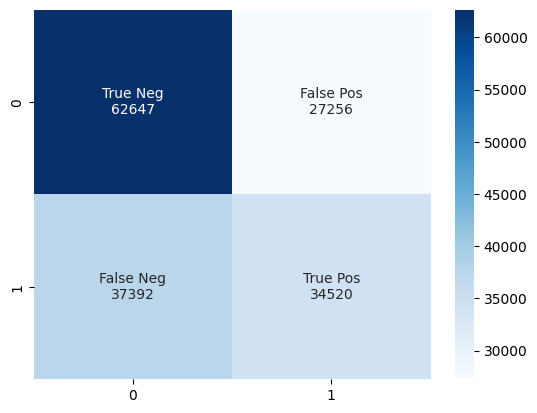

In [50]:
cm_knn=confusion_matrix(y_test, y_knn_test_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm_knn.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

knn_disp = sns.heatmap(cm_knn, annot=labels, fmt="", cmap='Blues')
knn_disp.plot()
plt.savefig('../Plots/ConfusionMatrix/KNeighborsClassifier.png')
plt.show()

### It's already a fairly big improvement, but not quite there yet, the kappa in the test is extremely lower than on the train
### Let's try a GridSearch of a RandomForest next

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [52]:
rfc = RandomForestClassifier(random_state=12)
tree_grid={
        'n_estimators' : [150, 300],
        'max_depth' : [7,10],
        'criterion' :  ['gini', 'entropy'],
        'min_samples_split' : [2,4],
        'min_samples_leaf' : [2],
        'max_features' : ['sqrt', 0.7]
        }

gs_tree = GridSearchCV(estimator = rfc, param_grid = tree_grid, cv=5, n_jobs=-1, verbose=True)

In [53]:
gs_tree.fit(pca_train_f, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


KeyboardInterrupt: 

In [54]:
with open("../Models/GridSearchRandomForest.pkl", "wb") as file:
    pickle.dump(gs_tree, file)

In [ ]:
gs_tree.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150}

In [ ]:
print("The accuracy for the BEST Random Forest in the TRAIN set is {:.2f}".format(gs_tree.score(pca_train_f,y_train)))
print("The accuracy for the BEST Random Forest in the TEST  set is {:.2f}".format(gs_tree.score(pca_test_f, y_test)))
print()

y_tree_train_pred=gs_tree.predict(pca_train_f)
y_tree_test_pred=gs_tree.predict(pca_test_f)

print("The kappa for the BEST Random Forest in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train, y_tree_train_pred)))
print("The kappa for the BEST Random Forest in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_tree_test_pred)))

The accuracy for the BEST Random Forest in the TRAIN set is 0.61
The accuracy for the BEST Random Forest in the TEST  set is 0.59

The kappa for the BEST Random Forest in the TRAIN set is: 0.19
The kappa for the BEST Random Forest in the TEST set is: 0.16


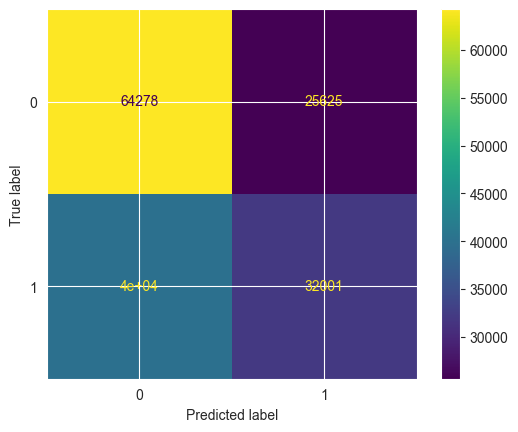

In [ ]:
cm_tree=confusion_matrix(y_test, y_tree_test_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm_tree.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

tree_disp = sns.heatmap(cm_tree, annot=labels, fmt="", cmap='Blues')
tree_disp.plot()
plt.savefig('../Plots/ConfusionMatrix/RandomForest.png')
plt.show()

### The Random Forest was significantly worse on the train set and slightly worse on the test set which is a bit surprising
### For the final model, we'll use a Gradient Boosting Classifier model 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gb = GradientBoostingClassifier(random_state=12, n_estimators=300, max_depth=5, max_features=0.7, min_samples_leaf=2, min_samples_split=2)
gb.fit(pca_train_f, y_train)
with open("../Models/GradientBoost.pkl", "wb") as file:
    pickle.dump(gb, file)

In [ ]:
print("The accuracy for the Gradient Boosting in the TRAIN set is {:.2f}".format(gb.score(pca_train_f,y_train)))
print("The accuracy for the Gradient Boosting in the TEST  set is {:.2f}".format(gb.score(pca_test_f, y_test)))
print()

y_gb_train_pred=gb.predict(pca_train_f)
y_gb_test_pred=gb.predict(pca_test_f)

print("The kappa for the Gradient Boosting in the TRAIN set is: {:.2f}".format(cohen_kappa_score(y_train, y_gb_train_pred)))
print("The kappa for the Gradient Boosting in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test, y_gb_test_pred)))

The accuracy for the Gradient Boosting in the TRAIN set is 0.62
The accuracy for the Gradient Boosting in the TEST  set is 0.60

The kappa for the Gradient Boosting in the TRAIN set is: 0.21
The kappa for the Gradient Boosting in the TEST set is: 0.18


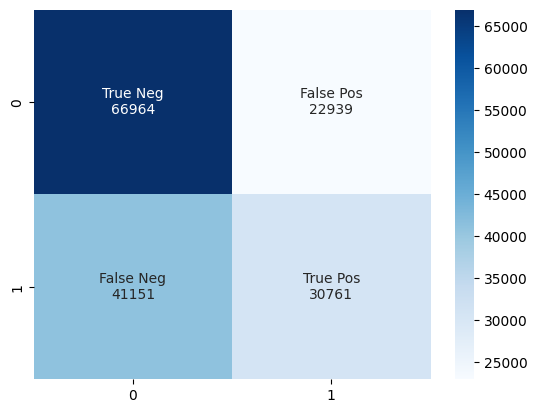

In [ ]:
cm_gb=confusion_matrix(y_test, y_gb_test_pred)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm_gb.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)

gb_disp = sns.heatmap(cm_gb, annot=labels, fmt="", cmap='Blues')
gb_disp.plot()
plt.savefig('../Plots/ConfusionMatrix/GradientBoost.png')
plt.show()

### Seems like our overall best model was the KNN one after all, but I'm happy to have tried all sorts of models